### Sobre o conjunto de dados

O dataset que será utilizado é referente a Pesquisa anual de desenvolvedores Stack Overflow de 2017, nele são examinados todos os aspectos da experiência do desenvolvedor, desde a satisfação com a carreira e a procura de emprego até a educação e opiniões sobre software de código aberto.

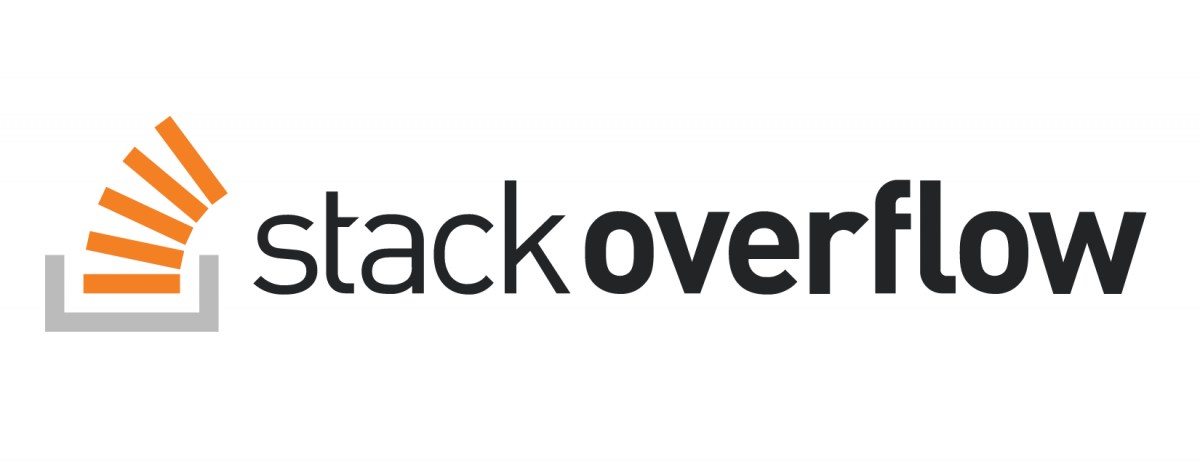

### O que iremos fazer e quais perguntas responderemos?

Iremos realizar a *EDA(Exploratory data analysis)*, para analisar e investigar o conjunto de dados e assim extrairmos alguns insights, muitas outras poderiam ser feitas nesse conjunto de dados, mas no momento vamos nos concentrar nisso. Além disso estaremos explorando duas questões, são essas:

- Qual é a sugestão dos participantes para que as pessoas entrem no mercado?
- Qual é a satisfação no trabalho de acordo com a pesquisa?

In [74]:
# importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import HowToBreakIntoTheField as t
%matplotlib inline

In [75]:
# importando os conjuntos de dados

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [76]:
list(df.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [77]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


#### Para entender como entrar no mercado, examinaremos o campo CousinEducation. Usaremos também o conjunto de dados schema para descobrir as sugestões dos participantes das pesquisa.

In [79]:
def get_description(column_name, schema=schema):
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

get_description(df.columns[0])

'Respondent ID number'

In [80]:
# vamos examinar a coluna CousinEducation com a função get_description que criamos

get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [81]:
# Observando os diferentes valores de status CousinEducation no conjunto de dados

cous_ed_vals = df.CousinEducation.value_counts()
cous_ed_vals

Take online courses; Buy books and work through the exercises                                                  192
None of these                                                                                                  167
Take online courses                                                                                            158
Take online courses; Part-time/evening courses; Buy books and work through the exercises                       140
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises             132
                                                                                                              ... 
Return to college; Get a job as a QA tester; Participate in online coding competitions                           1
Take online courses; Bootcamp; Participate in online coding competitions; Other                                  1
Master's degree; Part-time/evening courses; Participate in online coding competi

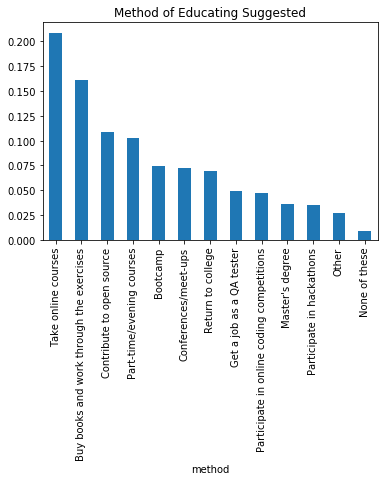

In [82]:
# Agora, vamos limpar dos dados e fazer uma plotagem respondendo a nossa primeira pergunta
# Qual é a sugestão dos participantes para que as pessoas entrem no mercado?

possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)
    
    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

props_df = clean_and_plot(df)

Podemos concluir que os conselhos mais populares são para aqueles que desejam entrar no mercado de programação são a realização de cursos onlines e estudo prático através de livros e exercícios.

#### Agora vamos direcionar a análise para a segunda pergunta, sobre a satisfação no trabalho sob alguns aspectos.

In [83]:
df['JobSatisfaction'].isnull().mean()

0.20149722542142184

In [84]:
# vamos observar a satisfação com o trabalho em relação à situação de emprego

df.groupby(['EmploymentStatus']).mean()['JobSatisfaction']

EmploymentStatus
Employed full-time                                      6.980608
Employed part-time                                      6.846154
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.231985
Not employed, and not looking for work                       NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [85]:
df.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()

CompanySize
10,000 or more employees    6.793617
5,000 to 9,999 employees    6.832155
1,000 to 4,999 employees    6.908506
20 to 99 employees          6.997039
Fewer than 10 employees     7.025719
100 to 499 employees        7.029324
500 to 999 employees        7.029967
10 to 19 employees          7.035739
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64

In [88]:
df.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values().dropna()

HomeRemote
Never                                                      6.697127
It's complicated                                           6.942053
More than half, but not all, the time                      6.973684
A few days each month                                      7.096694
About half the time                                        7.125737
Less than half the time, but at least one day each week    7.143786
All or almost all the time (I'm full-time remote)          7.405421
Name: JobSatisfaction, dtype: float64

Na análise realizada direcionada à satisfação no trabalho podemos obter 3 insights:

- Trabalhadores que trabalham por corta própria possuem nível de satisfação maior;
- Empresam que possuem menos funcionários tendem a ter um nível de satisfação maior entre os eles, e esse numero diminui à medida que o numero de funcionários aumenta;
- Trabalhores que possuem a rotina de trabalho home-office tendem a ser mais satisfeitos;